In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# A linearly separable training set.....................
X=np.array([[1.5,0.7],[1.6,1.0],[2.0,0.8],[1.2,1.5],[0.7,1.6],[1.7,1.0],[0.8,1.9],[0.9,0.8],[1.1,1.3],[1.0,1.5],[1.5,3.5],[2.5,2.0],[3.0,1.6],[3.0,2.5],[2.0,3.0],[2.8,1.4],[3.2,3.4],[2.5,2.5],[3.5,2.2],[2.5,3.2]])
y=np.array([+1,+1,+1,+1,+1,+1,+1,+1,+1,+1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])

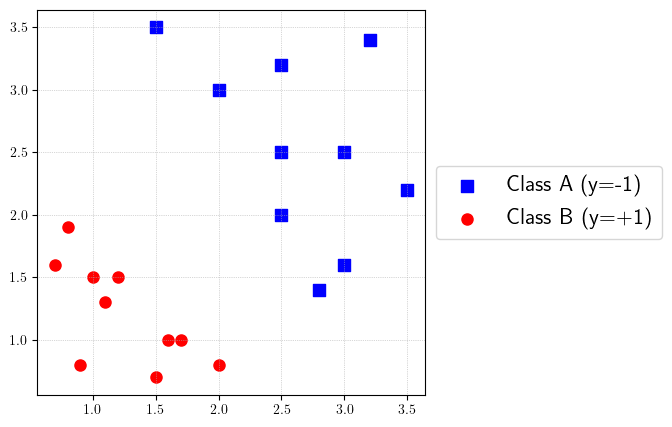

In [4]:
# Plot Points............................
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
plt.rc('text', usetex=True)
ax.scatter(X[y==-1,0],X[y==-1,1],s=64,edgecolors='blue',marker='s', facecolors='blue',label='Class A (y=-1)')
ax.scatter(X[y==+1,0],X[y==+1,1],s=64,edgecolors='red',marker='o', facecolors='red',label='Class B (y=+1)')
ax.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1, fontsize=16,facecolor=[1,1,1])
ax.grid(linestyle=':', linewidth=0.5)

In [11]:
def pers_plot(ax,cord,w,b,X=[],y=[]):  
    ax.grid(linestyle=':', linewidth=0.5)
    ax.set_xlim(cord[0],cord[1])
    ax.set_ylim(cord[2],cord[3])


    if w[1]!=0:
        ax.fill([cord[0],cord[0],cord[1],cord[1]],[-(w[0]*cord[0]+b)/w[1],cord[3],cord[3],-(w[0]*cord[1]+b)/w[1]],color=[0,0,1],alpha=.1,label='Negative Part')
        ax.fill([cord[0],cord[0],cord[1],cord[1]],[cord[2],-(w[0]*cord[0]+b)/w[1],-(w[0]*cord[1]+b)/w[1],cord[2]],color=[1,0,0],alpha=.1,label='Positive Part')
        ax.plot([cord[0],cord[1]],[-(w[0]*cord[0]+b)/w[1],-(w[0]*cord[1]+b)/w[1]],linewidth=4,color=[0,0,0],label='$'+str(w[0])+'x_1+'+str(w[1])+'x_2+'+str(b)+'=0$') #Plot Line
    else:
        z=-b/w[0]
        ax.fill([cord[0],cord[0],z,z],[cord[2],cord[3],cord[3],cord[2]],color=[0,0,1],alpha=.1,label='Negative Part')        
        ax.fill([z,z,cord[1],cord[1]],[cord[2],cord[3],cord[3],cord[2]],color=[1,0,0],alpha=.1,label='Positive Part')
        ax.plot([z,z],[cord[2],cord[3]],linewidth=4,color=[0,0,0],label='$'+str(w[0])+'x_1+'+str(w[1])+'x_2+'+str(b)+'=0$')  #Plot Line

    ax.scatter(X[y==-1,0],X[y==-1,1],s=64,edgecolors='blue',marker='s', facecolors='blue',label='Class A (y=-1)')
    ax.scatter(X[y==+1,0],X[y==+1,1],s=64,edgecolors='red',marker='o', facecolors='red',label='Class B (y=+1)')
    
    ax.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1, fontsize=16,facecolor=[1,1,1])


In [ ]:
cord=[-5,5,-5,5]

In [55]:
# Perceptron Algorithm
w,b=np.array([1,-2]),-2

eta=.75

inds=np.array([i for i in range(X.shape[0])])
for k in range(4000):
   
#    fig, ax = plt.subplots(1, 1, figsize=[5, 5])
#    pers_plot(ax,cord,w,b,X,y)
#    plt.show()

    ii=inds[y*(np.matmul(X,w.transpose())+b)<=0] # Index of wrong samples
    if len(ii)==0:
        break

    t=ii[np.random.randint(len(ii))]

    w=w+eta*y[t]*X[t]
    b=b+eta*y[t]


if len(ii)==0:
    print("=========================================================================================================")
    print("after ", k," iterations, with eta=",eta," the line seperator is find: w=",w," and b=",b)
    print("=========================================================================================================")        
else:
    print("=========================================================================================================")
    print("after ", k+1," iterations, with eta=",eta, "the line seperator is not find.")
    print("=========================================================================================================")        


after  22  iterations, with eta= 0.75  the line seperator is find: w= [-0.575 -1.775]  and b= 4.0
